In [1]:
 ## Classification with neural network

In [71]:
## Creating a demo data 
from sklearn.datasets import make_circles
import tensorflow as tf

# make 1000 example 
n_sample = 5000

X, y = make_circles(n_sample, noise=0.03, random_state=42)

In [72]:
X

array([[-0.75016489, -0.56389205],
       [ 0.78974434,  0.12875006],
       [ 0.74764022,  0.3065477 ],
       ...,
       [ 0.08857395,  0.84781275],
       [-0.76354876, -0.02878492],
       [-0.57873523,  0.84304373]])

In [73]:
y[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [74]:
import pandas as pd 

circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label':y})
X = circles[['X0', 'X1']] 
y = circles['label']

X.shape, y.shape

((5000, 2), (5000,))

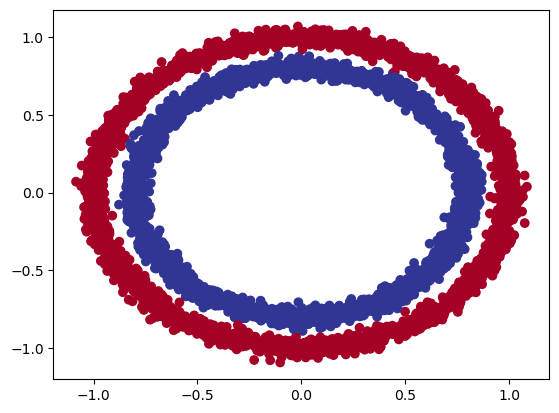

In [75]:
## Visualize 

import matplotlib.pylab as plt 
plt.scatter(x=X['X0'], y=X['X1'], c=y, cmap=plt.cm.RdYlBu)

In [88]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax'),
], name="model_1")

model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer= tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

model_history = model_1.fit(X, y, epochs=50)

Epoch 1/50


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:1214: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4810 - loss: 1.1902
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5690 - loss: 0.6804
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - loss: 0.6538
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.6168
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9302 - loss: 0.5466
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9830 - loss: 0.4156
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - loss: 0.2629
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.1562
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0975
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0654
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0473
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

<Axes: >

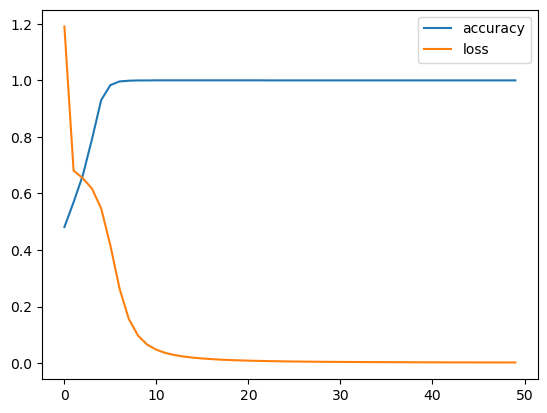

In [91]:
import pandas as pd 
pd.DataFrame(model_history.history).plot()

In [92]:
model_1.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 50)             │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,862 (19.00 KB)

 Trainable params: 1,620 (6.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,242 (12.67 KB)